In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# Exploración de los datos

In [3]:
df = pd.read_csv('Dataset/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
#Tabla con los precios del dataset
precios = df['price']
precios.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [6]:
#Precio mínimo en el dataset
min_precio = np.amin(precios)
#Precio máximo en el dataset
max_precio = np.amax(precios)
#Media del precio en el dataset
media_precio = np.mean(precios)
#Mediana del precio en el dataset
mediana_precio = np.median(precios)
#Desviación estándar del precio en el dataset
std_precio = np.std(precios)

#Resultados
print("Resultados:")
print("Precio mínimo: ${}".format(min_precio))
print("Precio máximo: ${}".format(max_precio))
print("Media: ${}".format(media_precio))
print("Mediana: ${}".format(mediana_precio))
print("Desviación Estándar: ${}".format(std_precio))

Resultados:
Precio mínimo: $75000.0
Precio máximo: $7700000.0
Media: $540088.1417665294
Mediana: $450000.0
Desviación Estándar: $367118.7031813723


## Correlacion entre las variables y precio

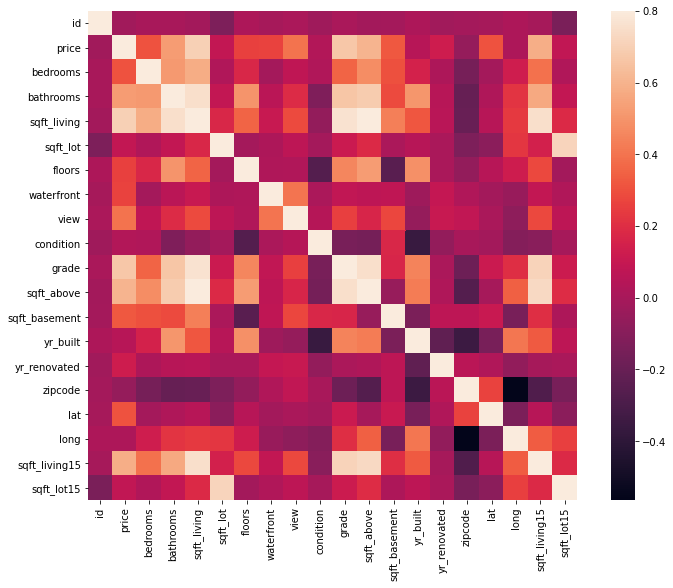

In [7]:
#Matriz de correlacion
matcorr = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(matcorr, vmax = .8, square = True)

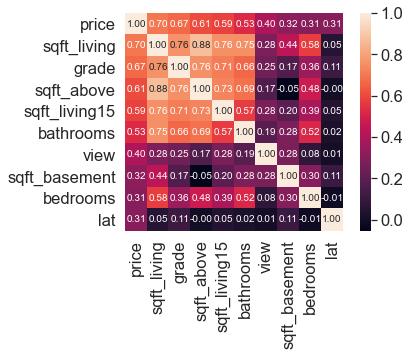

In [8]:
#Primeras 10 variables mas correlacionadas
n = 10 #numero de variables a utilizar para la matriz
col = matcorr.nlargest(n, 'price')['price'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = col.values, xticklabels = col.values)
plt.show()

In [9]:
#Tabla con las variables mas correlacionadas con precio
mas_corr = pd.DataFrame(col)
mas_corr.columns = ['Variables mas correlacionadas']
mas_corr

,Variables mas correlacionadas
0,price
1,sqft_living
2,grade
3,sqft_above
4,sqft_living15
5,bathrooms
6,view
7,sqft_basement
8,bedrooms
9,lat


## Limpieza del dataset

In [72]:
#Buscando valores nulos en el dataset
nan_rows = df[df.isnull().any(1)]
nan_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [75]:
#Dataset final a utilizar
dataset = df.copy().drop(['id', 'date', 'sqft_lot', 'floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15', 'condition'], axis = 1)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,0,8,1680,0,47.6168,1800


## Gráficos de dispersión

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


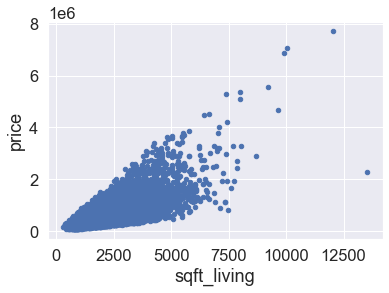

In [31]:
#Sqft_living vs precio
df.plot.scatter('sqft_living', 'price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


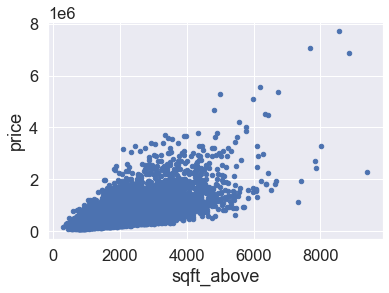

In [47]:
#Sqft_above vs precio
df.plot.scatter('sqft_above', 'price')

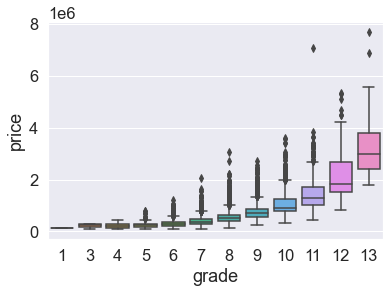

In [45]:
#Calificacion vs precio
#df.plot.scatter('grade', 'price')
sns.boxplot(x=df['grade'], y=df['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


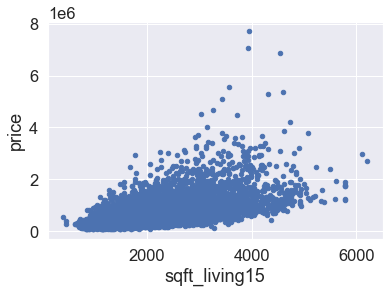

In [37]:
#Sqft_living15 vs precio
df.plot.scatter('sqft_living15', 'price')

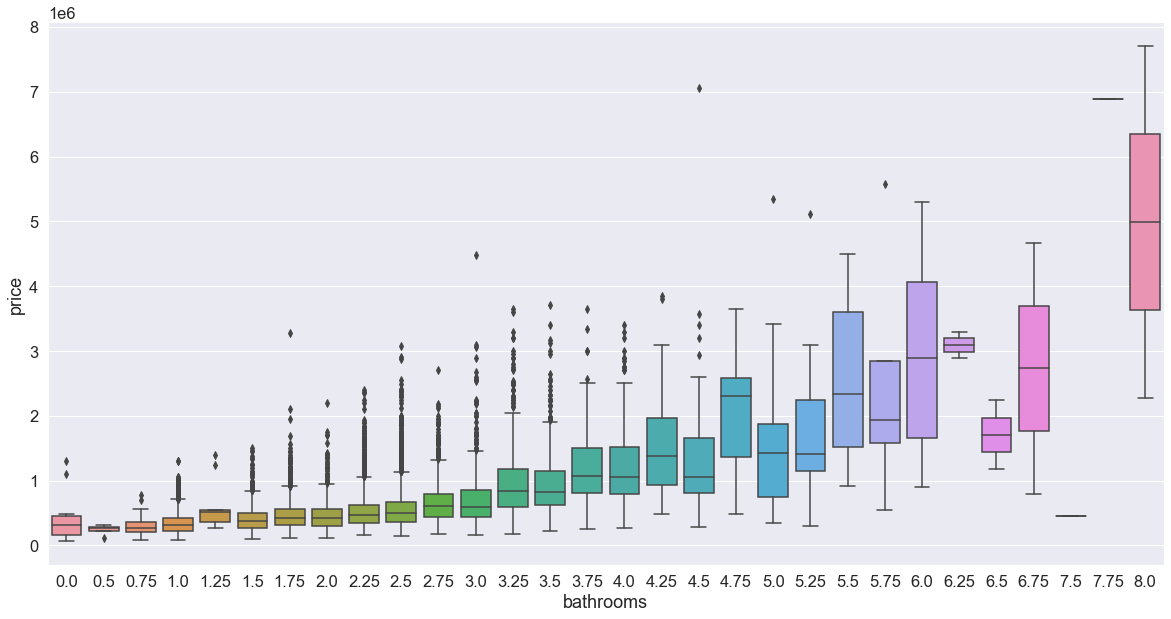

In [53]:
#Baños vs precio
#df.plot.scatter('bathrooms', 'price')
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=df['bathrooms'], y=df['price'])

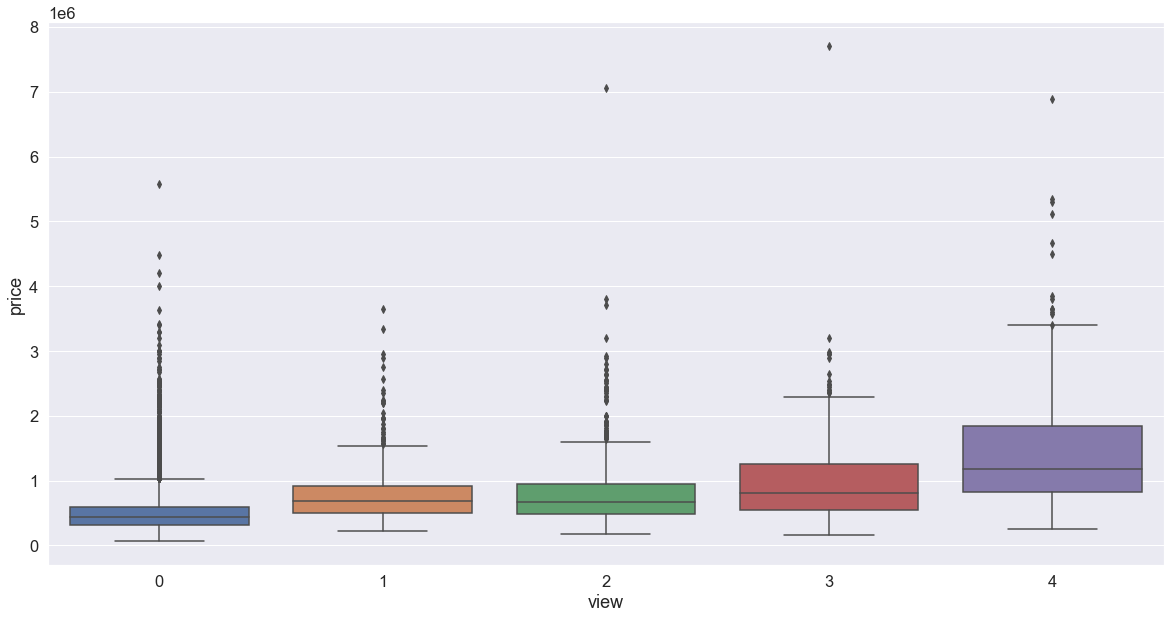

In [60]:
#Vista vs precio
#df.plot.scatter('view', 'price')
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=df['view'], y=df['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


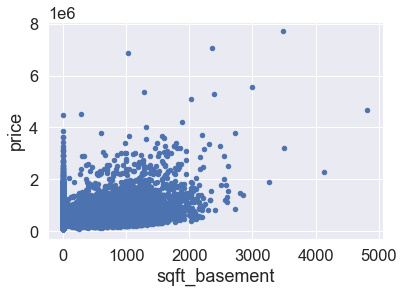

In [40]:
#Sqft_basement vs precio
df.plot.scatter('sqft_basement', 'price')

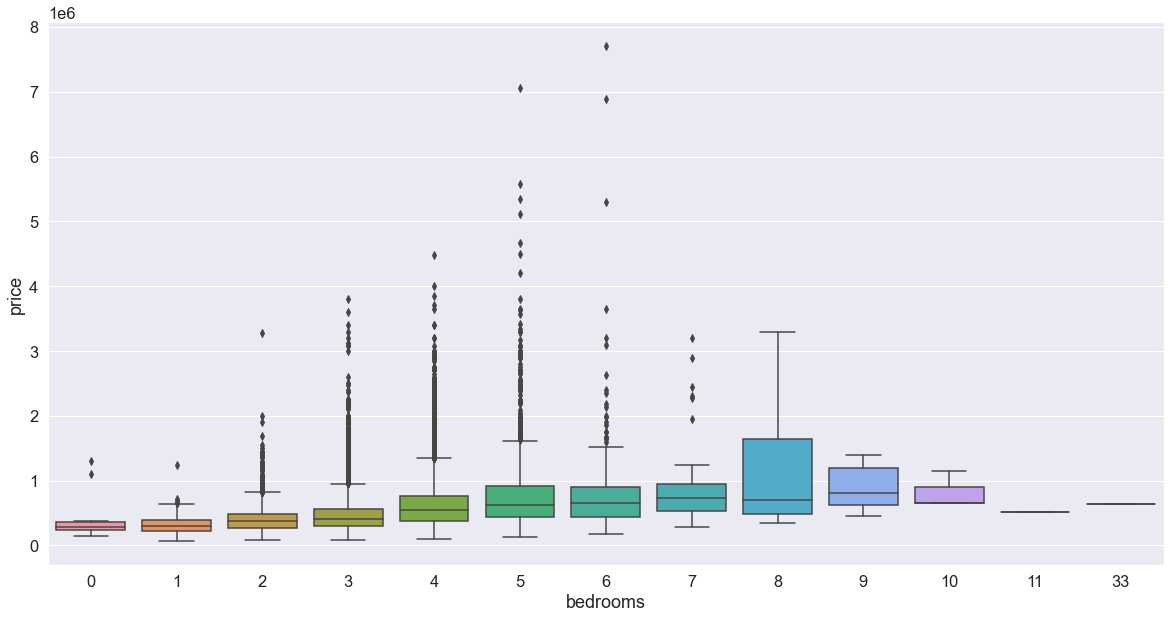

In [55]:
#Habitaciones vs precio
#df.plot.scatter('bedrooms', 'price')
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x=df['bedrooms'], y=df['price'])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


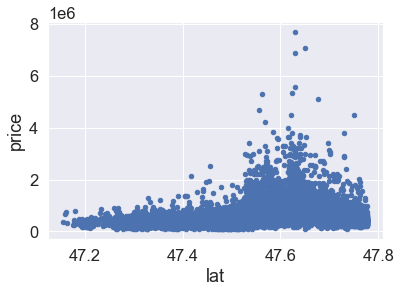

In [59]:
#Latitud vs precio
df.plot.scatter('lat', 'price')